In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
from tqdm import tqdm

from utils import view_samples
from training import train_discriminator, train_generator, make_samples

In [2]:
# number of subprocesses to use for data loading
num_workers = 4
# how many samples per batch to load
batch_size = 128

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# get the training datasets
train_data = datasets.FashionMNIST(root='data', train=True,
                                   download=True, transform=transform)

# prepare data loader
train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size,
                                           num_workers=num_workers)

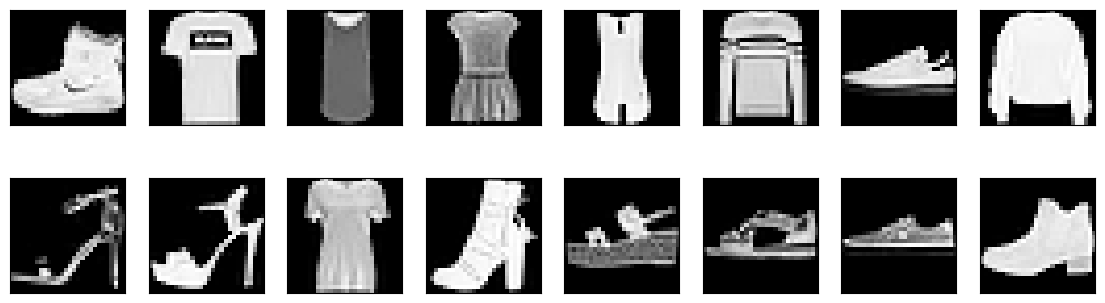

In [3]:
images, _ = next(iter(train_loader))
view_samples(images[:16])

In [3]:
class Discriminator(nn.Module):
    def __init__(self, input_size: int, hidden_dim: int) -> None:
        super().__init__()
        
        self.discriminator = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
    
            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim // 4, 1)
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.discriminator(x)

In [4]:
class Generator(nn.Module):
    def __init__(self, latent_dim: int, hidden_dim: int, output_size: int) -> None:
        super().__init__()
        
        self.generator = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim // 4),
            nn.LeakyReLU(0.2),
            
            nn.Linear(hidden_dim // 4, hidden_dim // 2),
            nn.LeakyReLU(0.2),
            
            nn.Linear(hidden_dim // 2, hidden_dim),
            nn.LeakyReLU(0.2),
            
            nn.Linear(hidden_dim, output_size),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.generator(x)

In [5]:
input_size = 28 * 28
hidden_size = 128
latent_size = 100
lr = 0.0002
num_epochs = 10

discriminator = Discriminator(input_size, hidden_size)
generator = Generator(latent_size, hidden_size, input_size)

disc_optimizer = optim.Adam(discriminator.parameters(), lr)
gen_optimizer = optim.Adam(generator.parameters(), lr)

epoch 1/10: 100%|██████████| 469/469 [00:15<00:00, 31.13it/s]


Discriminator loss: 2.793774366378784 - Generator_loss: 5.643418312072754


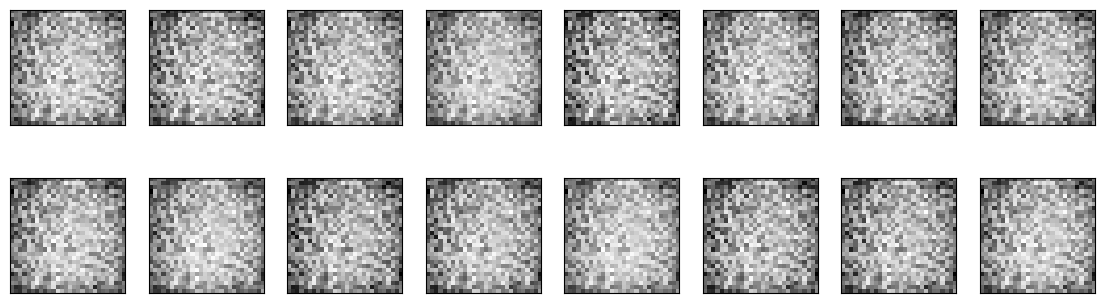

epoch 2/10: 100%|██████████| 469/469 [00:15<00:00, 30.29it/s]


Discriminator loss: 1.6478962898254395 - Generator_loss: 14.312541007995605


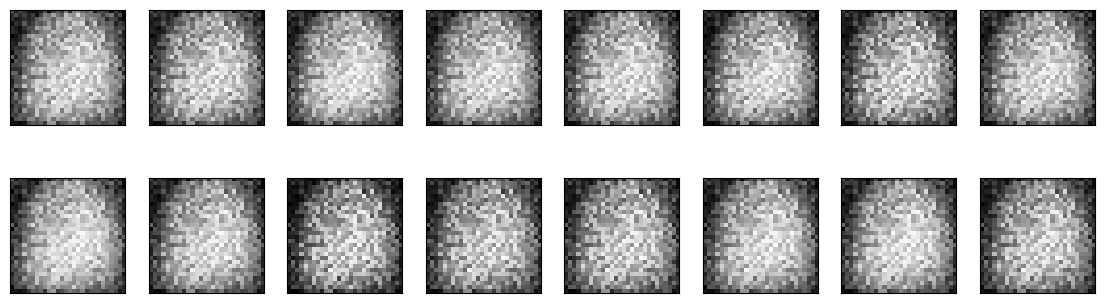

epoch 3/10: 100%|██████████| 469/469 [00:15<00:00, 29.57it/s]


Discriminator loss: 1.4806925058364868 - Generator_loss: 19.113542556762695


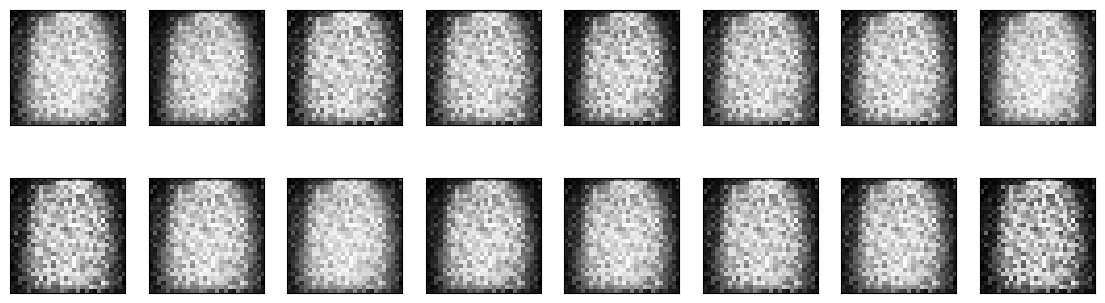

epoch 4/10: 100%|██████████| 469/469 [00:14<00:00, 32.65it/s]


Discriminator loss: 1.5446075201034546 - Generator_loss: 22.11125946044922


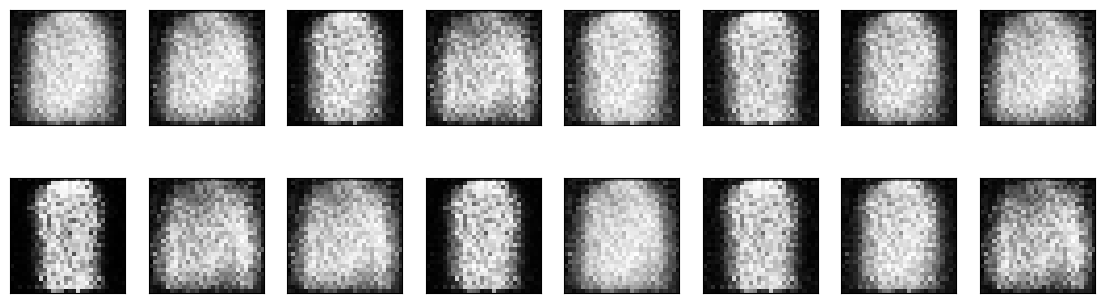

epoch 5/10: 100%|██████████| 469/469 [00:16<00:00, 29.12it/s]


Discriminator loss: 1.677329182624817 - Generator_loss: 20.185989379882812


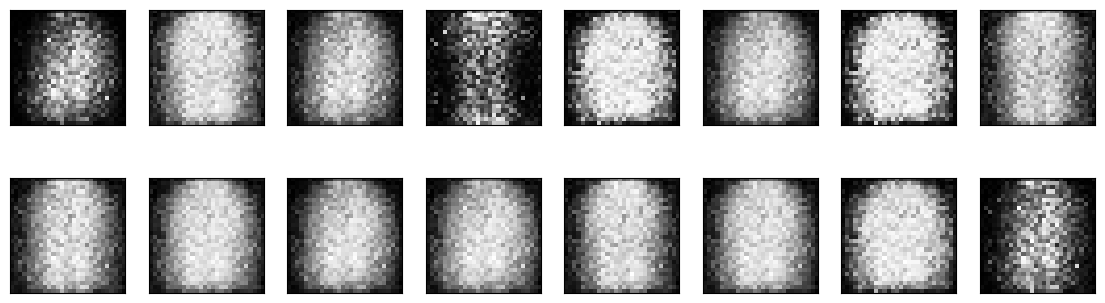

epoch 6/10: 100%|██████████| 469/469 [00:16<00:00, 29.12it/s]


Discriminator loss: 1.8924521207809448 - Generator_loss: 17.887582778930664


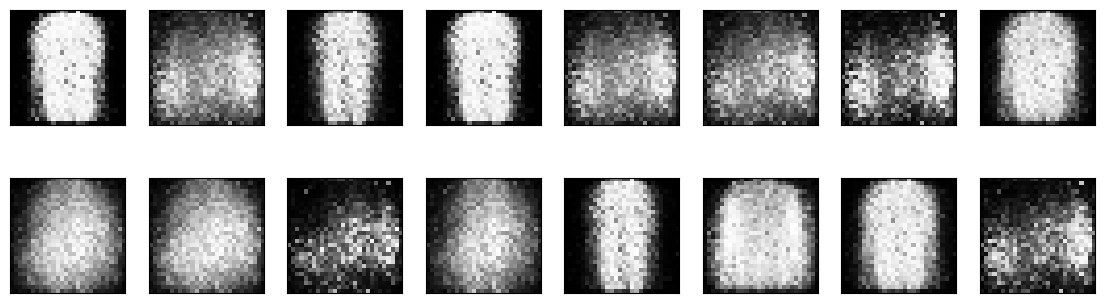

epoch 7/10: 100%|██████████| 469/469 [00:17<00:00, 27.51it/s]


Discriminator loss: 2.0759544372558594 - Generator_loss: 15.975567817687988


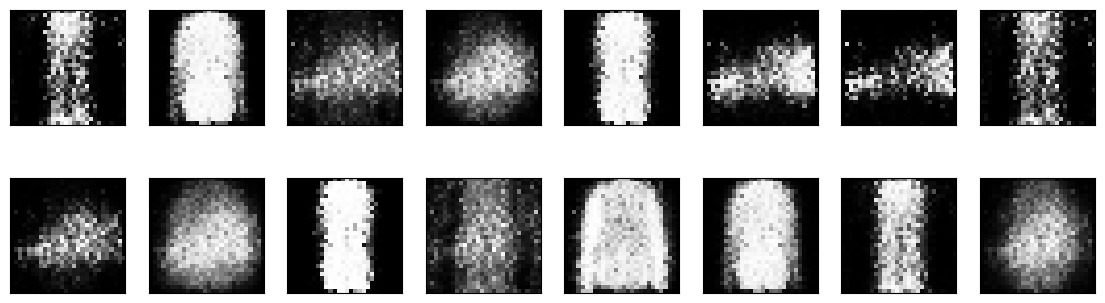

epoch 8/10: 100%|██████████| 469/469 [00:15<00:00, 30.01it/s]


Discriminator loss: 2.1947925090789795 - Generator_loss: 14.14136028289795


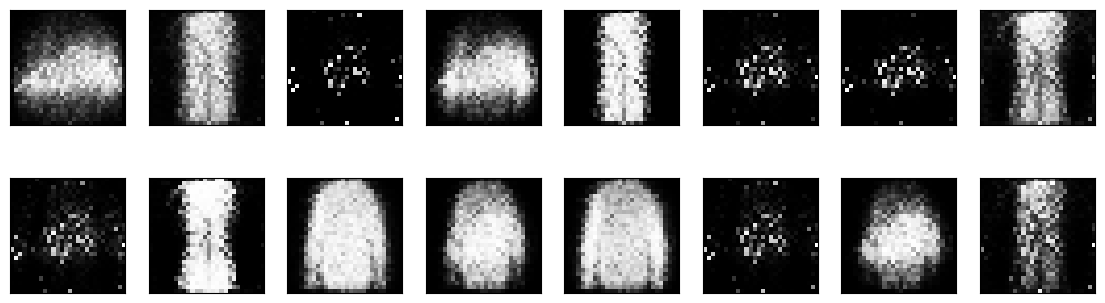

epoch 9/10: 100%|██████████| 469/469 [00:13<00:00, 33.52it/s]


Discriminator loss: 2.1224029064178467 - Generator_loss: 14.493392944335938


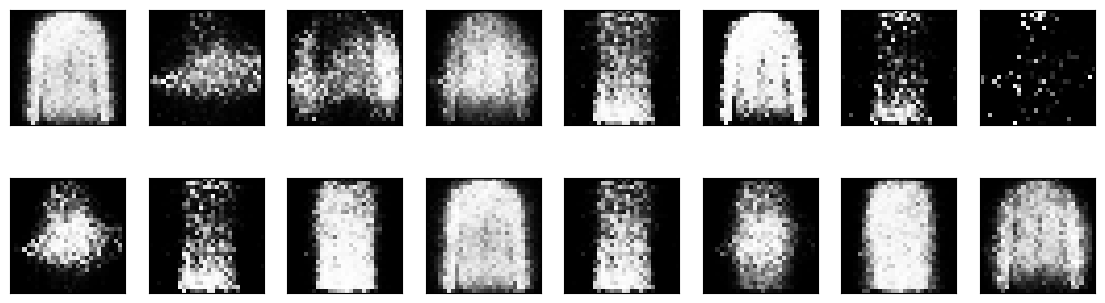

epoch 10/10: 100%|██████████| 469/469 [00:13<00:00, 34.08it/s]


Discriminator loss: 2.31862735748291 - Generator_loss: 13.814400672912598


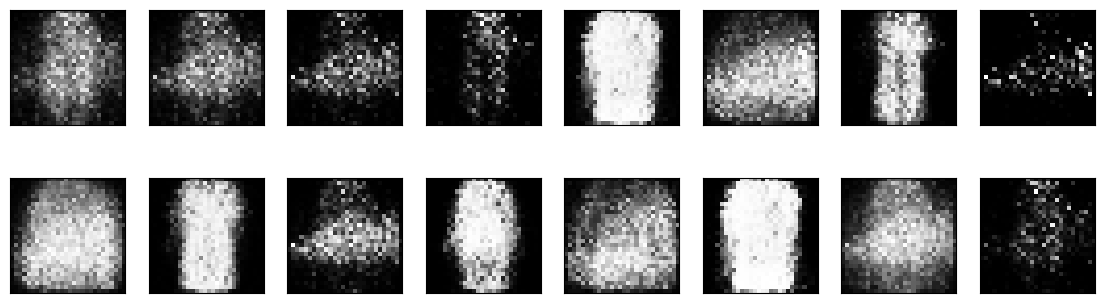

In [6]:
for epoch in range(num_epochs):
    disc_loss = 0
    gen_loss = 0
    for real_images, _ in tqdm(train_loader, desc=f'epoch {epoch+1}/{num_epochs}'):
        disc_loss += train_discriminator(real_images, discriminator, disc_optimizer, 
                                        generator, latent_size)
        gen_loss += train_generator(discriminator, generator, gen_optimizer, batch_size, 
                                   latent_size)
        
    mean_disc_loss = disc_loss / batch_size
    mean_gen_loss = gen_loss / batch_size
    print(f'Discriminator loss: {mean_disc_loss} - Generator_loss: {mean_gen_loss}')
    
    samples = make_samples(generator, 16, latent_size)
    view_samples(samples)
    
        
        